# Decision Tree
## This notebook outlines the main concepts behind the Decision Tree

In [2]:
import numpy as np
import pandas as pd
RSEED = 50

# Theory behind Decision Tree

### Construct a simple binary classification problem with the following data

,X1,X2,y
0,2,2,0
1,2,1,1
2,2,3,1
3,1,2,1
4,1,1,0
5,3,3,1


### Make two Numpy Arrays
- 2-D array with 6 samples (X1, X2)
- 1-D array with 6 labels (y)

In [3]:
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

### Create dataframes and replicate the above dataframe

In [4]:
data = pd.DataFrame(X)
data

,0,1
0,2,2
1,2,1
2,2,3
3,1,2
4,1,1
5,3,3


In [5]:
data['y'] = pd.Series(y)
data

,0,1,y
0,2,2,0
1,2,1,1
2,2,3,1
3,1,2,1
4,1,1,0
5,3,3,1


### Helper function to visualize the binary classification problem 

Text(0.5, 1.0, 'Data')

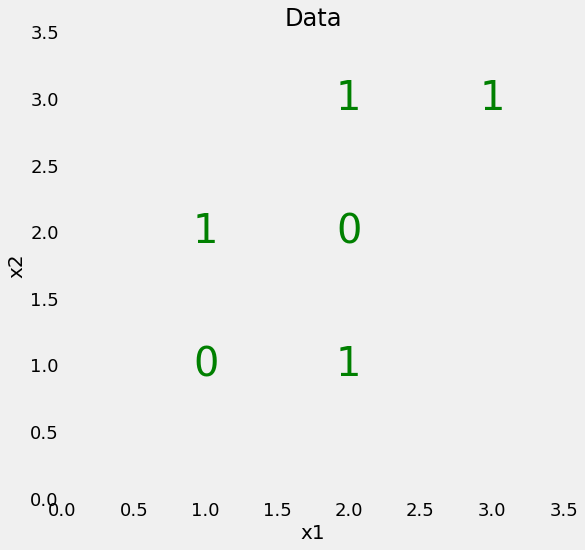

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

### Can you a draw a single line to separate the classes ?

- Linearly inseparable problem.

## Decision Tree

- Use Scikit-learn

### Choose the DecisionTreeClassifier model

In [7]:
from sklearn.tree import DecisionTreeClassifier

### Build the DecisionTreeClassifier model

In [8]:
tree = DecisionTreeClassifier(random_state=RSEED)

### Fit the model

In [9]:
tree.fit(X, y)

DecisionTreeClassifier(random_state=50)

A **decision tree** is a series of **yes/no questions** asked about our data eventually leading to a predicted class (or continuous value in the case of regression). This is an interpretable model because it makes classifications much like we do: we ask a sequence of queries about the available data we have until we arrive at a decision (in an ideal world).

Technically,
a decision tree is built by determining the questions (called **splits** of nodes) that, when answered, lead to the greatest reduction in **Gini Impurity**. What this means is the decision tree tries to form nodes containing a high proportion of samples (data points) from a single class by finding values in the features that cleanly divide the data into classes.

Summary

The tree will learn how to separate the points by 
 - building a flowchart of **questions** based on the feature values and the labels
 - At each stage, the decision tree makes splits by maximizing the reduction in **Gini impurity**. 

### Get the tree's node count and maximum depth of the tree

In [10]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


### Get the model's accuracy

In [11]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


### Wow! That was something, right?
### Wait. There is something wrong here.

# Entire portion - do not run. Only run after installing graphviz which will take some time and hurdles to pass
## Visualize Decision Tree

To get a sense of how the decision tree "thinks", it's helpful to visualize the entire structure. This will show each node in the tree which we can use to make new predictions. Because the tree is relatively small, we can understand the entire image.

First we export the tree as a `dot` file making sure to label the features and the classes.

In [18]:
from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

Next we use a system command and the Graphziv `dot` function to convert to a `png` (image). This requires Graphviz to be installed on your computer. 

In [19]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

Finally, we display the entire tree.

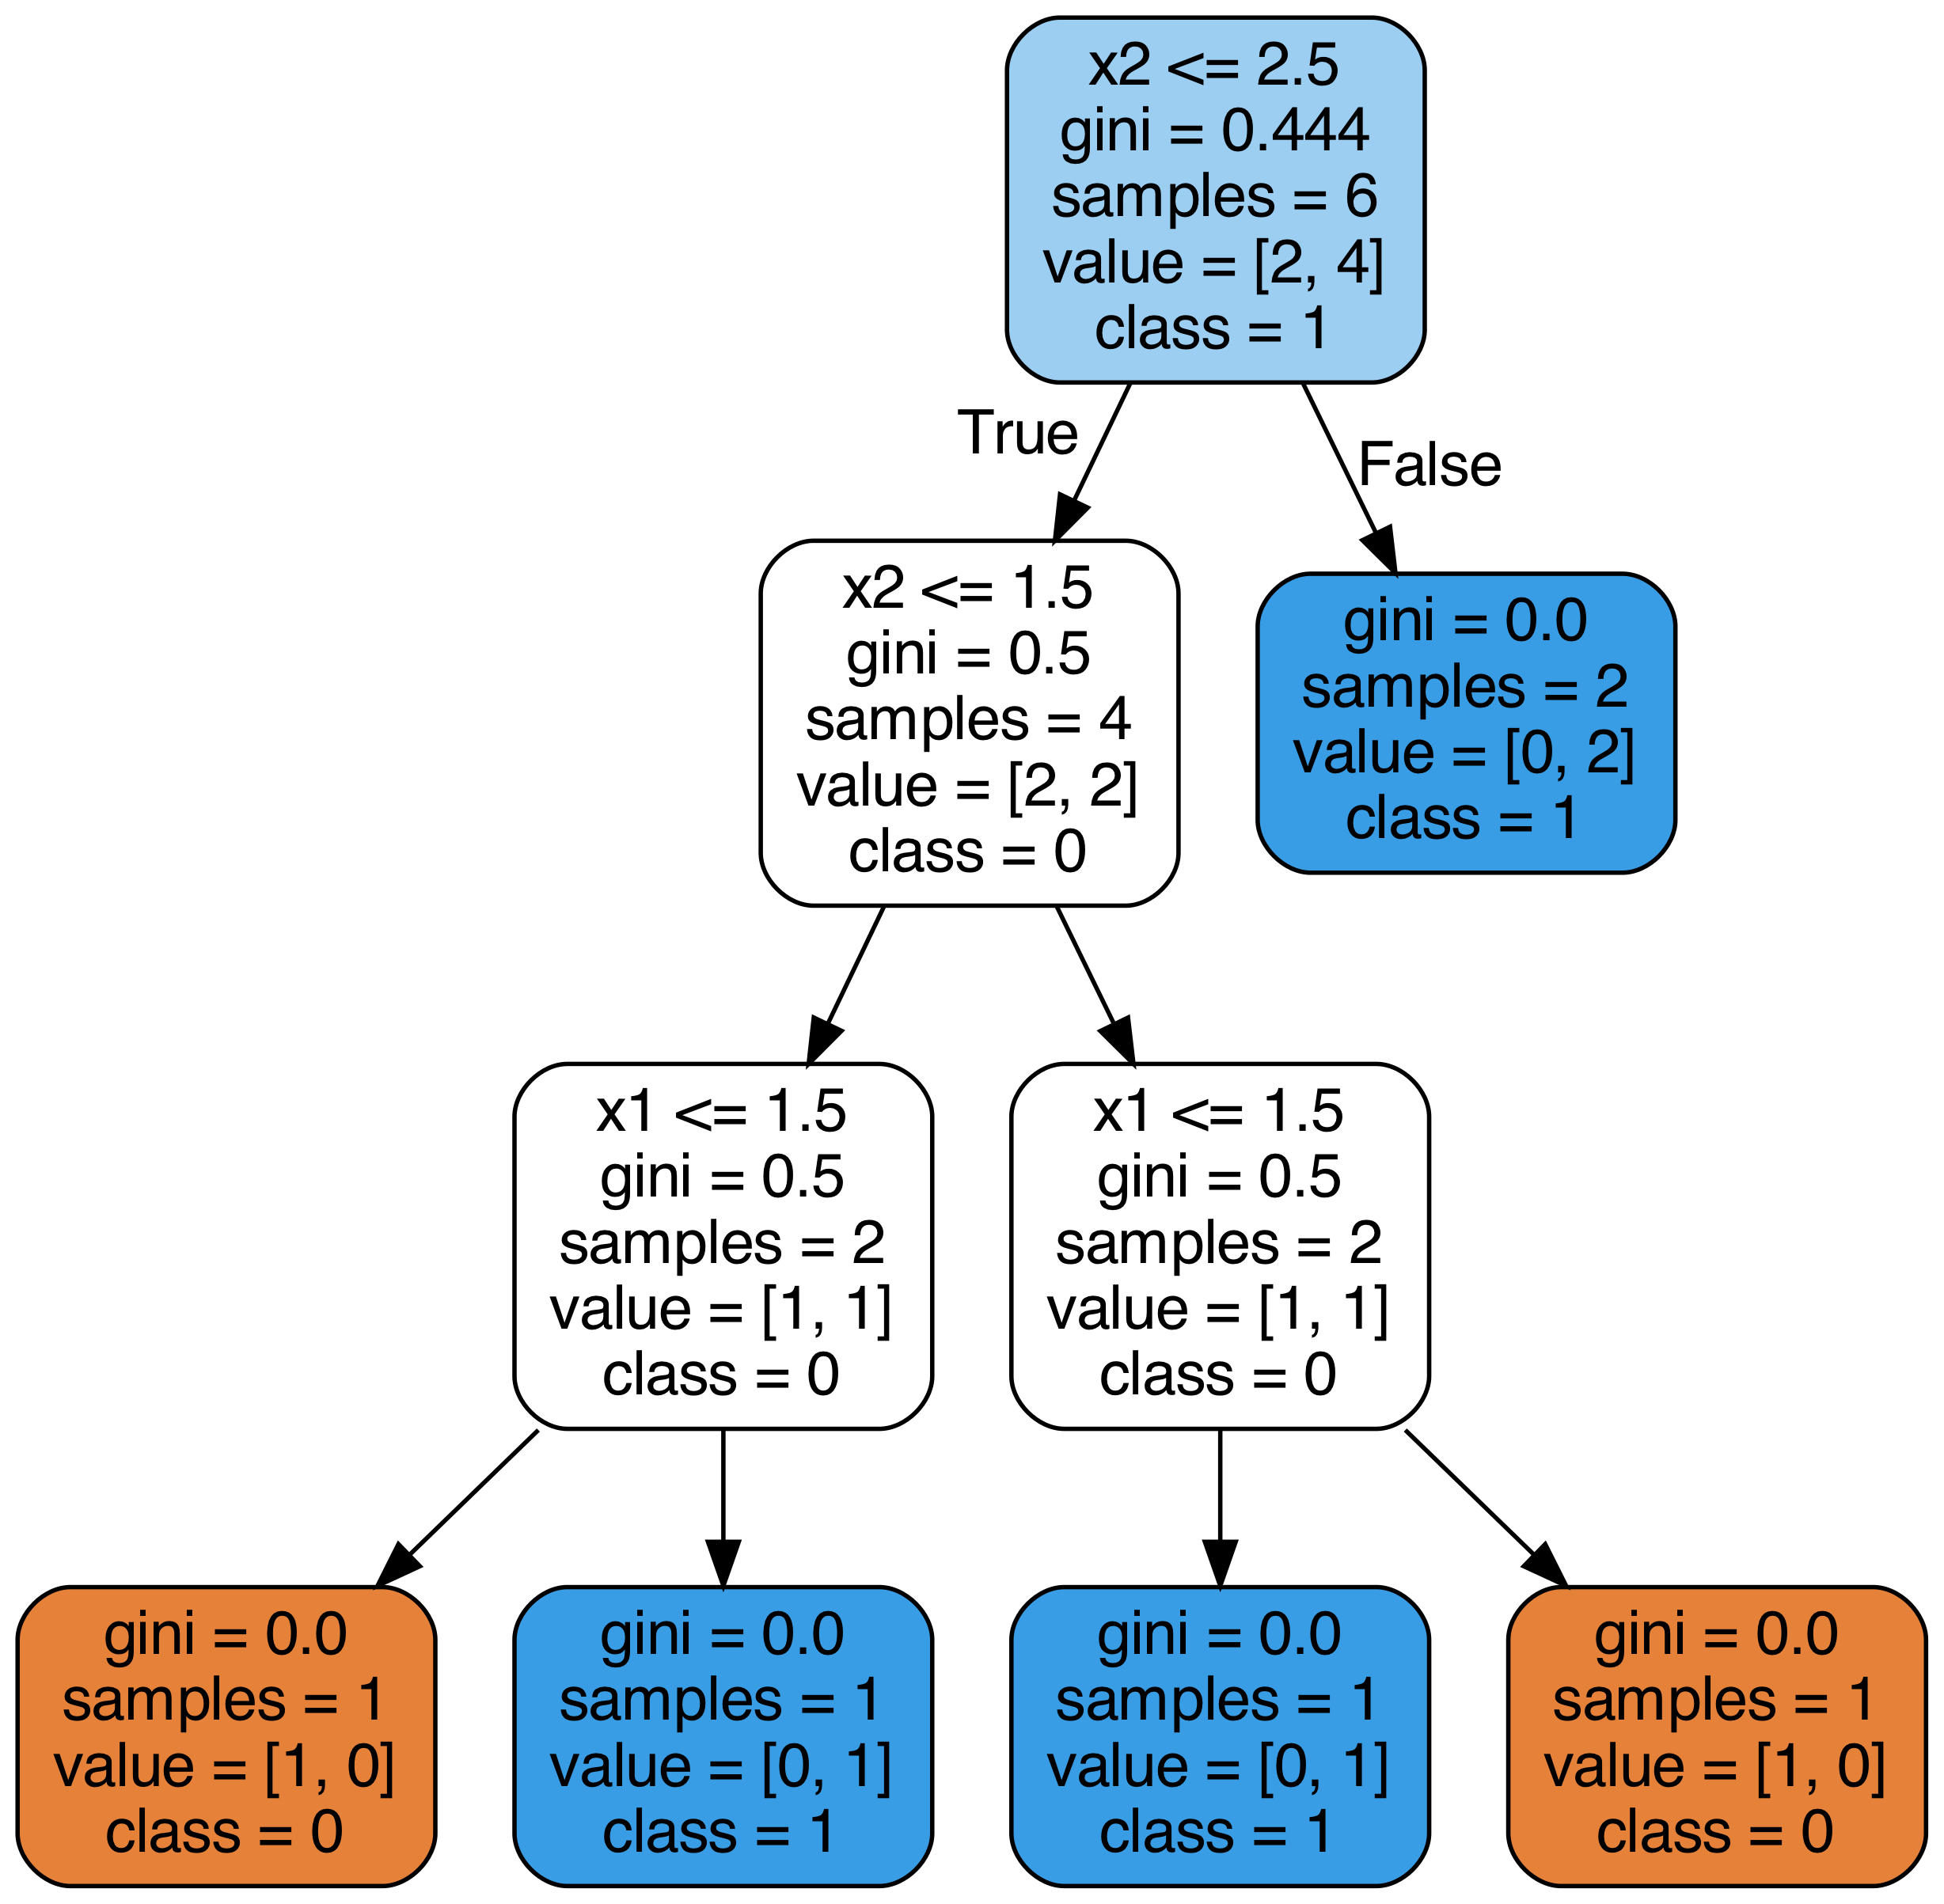

In [20]:
from IPython.display import Image
Image('tree.png')

A decision tree is an intuitive model: it makes decisions much as we might when faced with a problem by constructing a flowchart of questions. For each of the nodes (except the leaf nodes), the five rows represent:

1. **Question** asked about the data based on a feature: this determines the way we traverse down the tree for a new datapoint.
2. **gini**: the Gini Impurity of the node. The average (weighted by samples) gini impurity decreases with each level of the tree.
3. **samples**: number of training observations in the node
4. **value**: [number of samples in the first class, number of samples in the second class]
5. **class**: the class predicted for all the points in the node if the tree ended at this depth (defaults to 0 for a tie).

The leaf nodes (the terminal nodes at each branch) do not have a question because they are where the tree makes a prediction. All of the samples in a leaf node are assigned the same class. 

### Gini Impurity

- Probability that a randomly selected sample from the node will be incorrectly classified according to the distribution of samples in the node. At the top, there is a 44.4% chance that a randomly selected point would be incorrectly classified. The Gini Impurity is how the decision tree makes splits. It splits the samples based on the value of a feature that reduces the Gini Impurity by the largest amount.

- Gini Impurity

Ig (n) = 1 - ( (p1) ^2 + (p2) ^2 + ... (pn) ^2 )

### Compute Gini Impurity for root node

### Compute Gini Impurity for Second layer left node

### Compute Gini Impurity for Second layer right node

### Compute Gini Impurity for Third layer left node

### Compute Gini Impurity for second layer
Isecondlayer = (nleft / nparent) * Ileft + (nright/nparent) * Iright

### Compute Gini Impurity for Last layer

## Overfitting!!!
- Limit the depth of the tree
- Build a forest of trees

### Is Maximum depth plays a role?
Build the DecisionTreeClassifier with Minimum depth as 2 and score the accuracy

In [25]:
short_tree = DecisionTreeClassifier(max_depth = 2, random_state=RSEED)
short_tree.fit(X, y)

print(f'Model Accuracy: {short_tree.score(X, y)}')

Model Accuracy: 0.6666666666666666


Now, let us visualize the entire decision tree

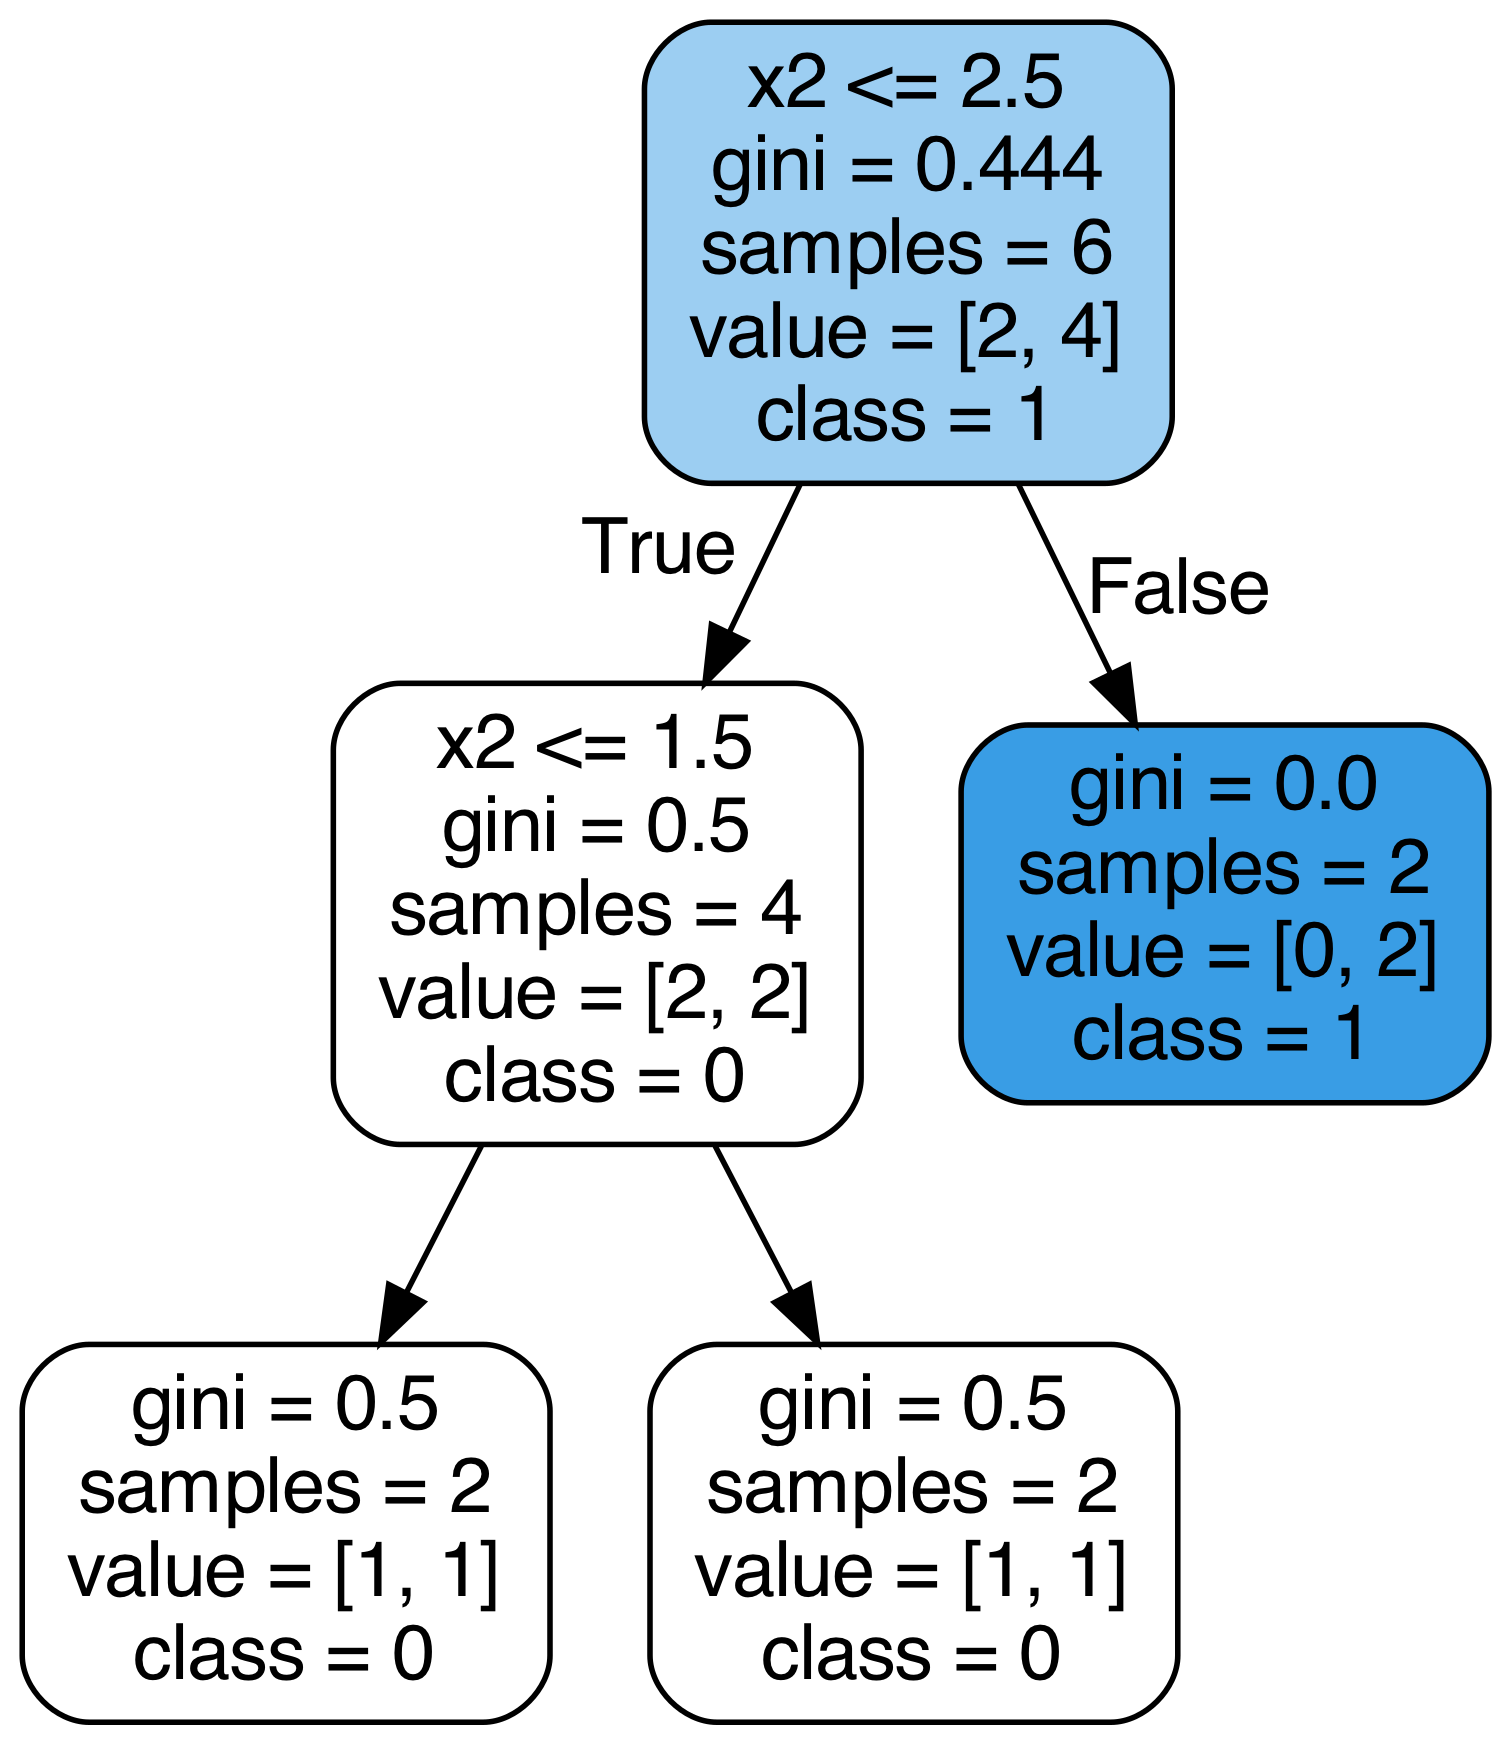

In [26]:
# Export as dot
export_graphviz(short_tree, 'shorttree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

call(['dot', '-Tpng', 'shorttree.dot', '-o', 'shorttree.png', '-Gdpi=400']);
Image('shorttree.png')

Our model no longer gets perfect accuracy on the _training data_. However, it probably would do better on the _testing data_ since we have limited the maximum depth to prevent overfitting. This is an example of the bias - variance tradeoff in machine learning which we will see in the subsequent lecture. 

- High variance model has learned the training data very well but often cannot generalize to new points in the test set
- High bias model has not learned the training data very well because it does not have enough complexity

Overfitting avoidance

- **Limiting the depth** of a single decision tree is one way we can try to make a less biased model. 
- Use an entire forest of trees, training each one on a random subsample of the training data. The final model then takes an average of all the individual decision trees to arrive at a classification. This is the idea behind the **random forest**.